# Experiment 4

## Data Pre-processing

### Importing important necessary packages and reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### Getting A Brief Idea About the Data

In [3]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

### Dropping The Unnecessary Columns

In [4]:
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')

### Renaming certain column names to simpler and easier to understand names

In [5]:
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-Status'}, inplace=True)

### Adding a column to display the total immigration over the years for all countries

In [6]:
canada['TotalImmigration'] = canada.sum(axis='columns')

### Checking for null values in the Data

In [7]:
canada.isnull().sum().sum() #Putting the second sum value so that all the null from all columns are also added

0

### Changing the index of the data to the Country Name for better understanding

In [8]:
canada.set_index('Country', inplace = True)
canada.head()

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


### Convert column names to String to have a unified format

In [9]:
canada.columns = list(map(str,canada.columns))
canada.columns

Index(['Continent', 'Continent-Region', 'Development-Status', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', 'TotalImmigration'],
      dtype='object')

# Data Visualization

## Pie Plots

### Making an x label to chart our plots against

In [10]:
years = list(map(str, range(1980,2014)))

### Total Count of Immigration across all countries

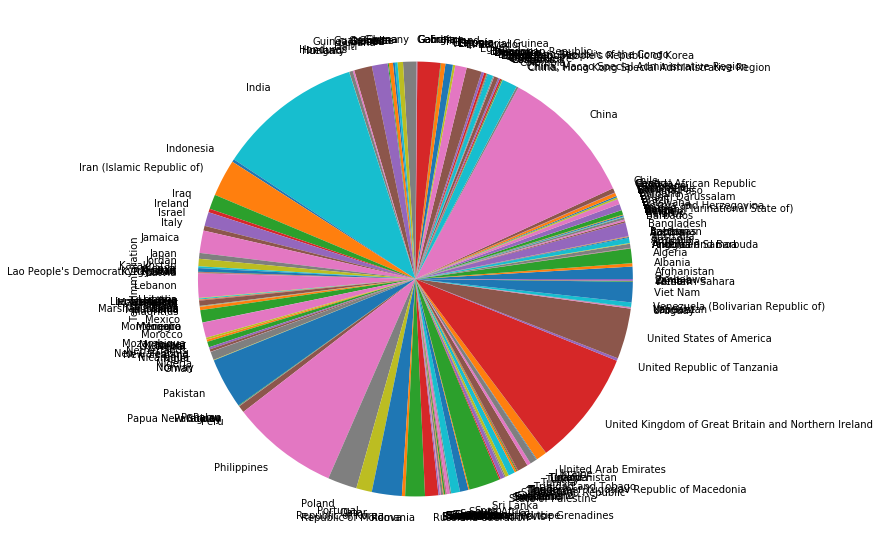

In [11]:
canada['TotalImmigration'].plot(kind='pie',figsize=(10,10))

### Plotting the total immigration data by each continent 

In [12]:
can_continent = canada.groupby('Continent', axis='index').sum()
can_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


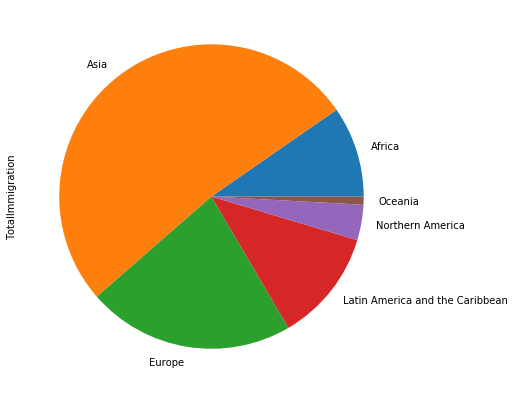

In [13]:
can_continent['TotalImmigration'].plot(kind='pie', figsize=(7, 7))

### Modifying the graph

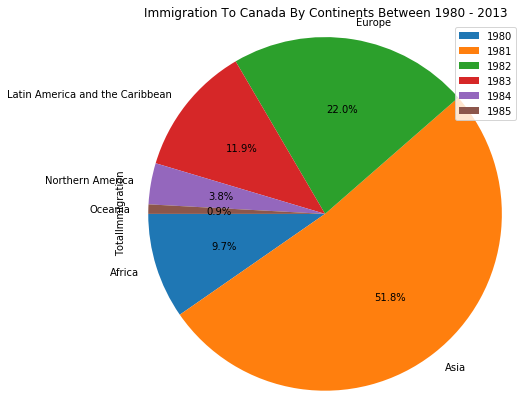

In [14]:
can_continent['TotalImmigration'].plot(kind='pie', figsize=(7, 7),
                                      startangle = 180, autopct = '%1.1f%%')
plt.title('Immigration To Canada By Continents Between 1980 - 2013')
plt.axis('equal')
plt.legend(labels = can_continent.columns, loc='upper right')
plt.show()

### Plotting Immigration Data by Development Status

In [15]:
can_devstatus = canada.groupby('Development-Status', axis='index').sum()
can_devstatus.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Development-Status,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,...,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,...,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142


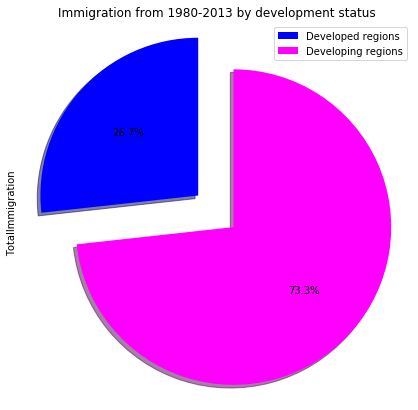

In [16]:
explodeList = [0.3,0]
colorList=['blue','magenta']
can_devstatus['TotalImmigration'].plot(kind='pie', figsize=(7,7), startangle=90,autopct='%1.1f%%', 
                                 shadow=True, labels = None, colors = colorList, explode = explodeList)
plt.title('Immigration from 1980-2013 by development status')
plt.axis('equal')
plt.legend(labels= can_devstatus.index,loc ='upper right')
plt.show()

### Plotting a pie chart for Immigration with respect to Country-Region 

In [17]:
can_contreg = canada.groupby('Continent-Region', axis='index').sum()
can_contreg.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Continent-Region,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,1304,1119,848,457,481,467,532,675,610,790,...,1279,1193,1383,1498,1538,1423,1226,1399,1536,34215
Caribbean,7045,8310,8326,6998,5553,6048,8716,10932,9229,10786,...,6816,6652,7826,8862,8847,10549,11958,11898,10393,308253
Central America,734,921,1612,3648,4087,4862,5909,6804,5596,5821,...,3990,4140,5039,4891,4814,5692,5821,6019,5644,161653
Central Asia,0,0,0,0,0,0,0,0,0,0,...,1134,903,936,805,962,905,769,1029,691,15024
Eastern Africa,1471,1641,1426,1094,1187,1134,1454,2734,3237,4094,...,7083,6750,6669,6705,6922,8591,8956,8846,9448,167389


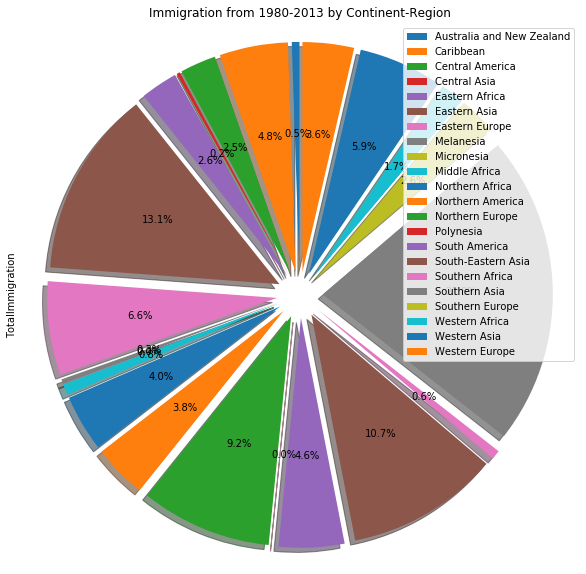

In [18]:
explodeList = [0.1]*22
#colorList=['blue','magenta']
can_contreg['TotalImmigration'].plot(kind='pie', figsize=(10,10), startangle=90,autopct='%1.1f%%', 
                                 shadow=True, labels = None, explode = explodeList)
plt.title('Immigration from 1980-2013 by Continent-Region')
plt.axis('equal')
plt.legend(labels= can_contreg.index,loc ='upper right')
plt.show()

## Box Plots

### Plotting a boxplot for Immigration from India across the years

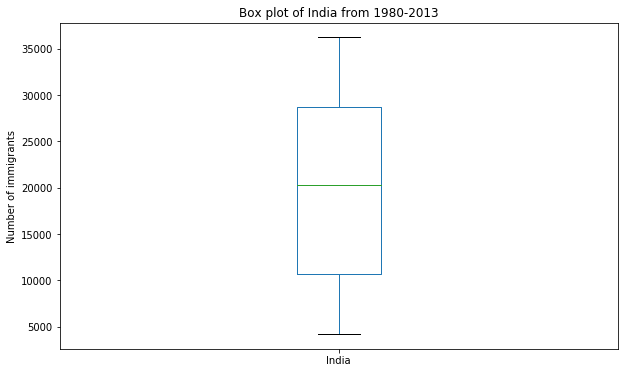

In [19]:
india = canada.loc['India', years]

india.plot(kind='box', figsize=(10,6))
plt.title('Box plot of India from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

### Comparative Boxplot for Immigration from India and Pakistan

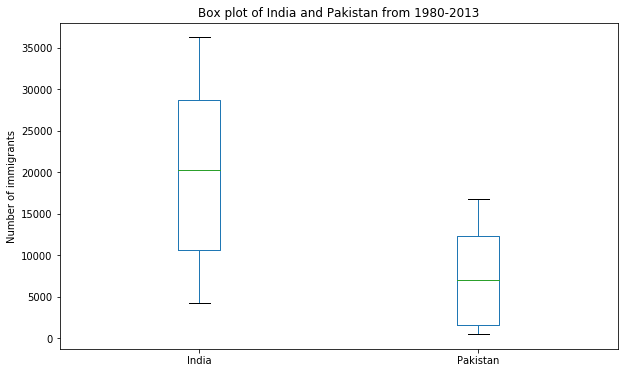

In [20]:
indopak = canada.loc[['India','Pakistan'], years].transpose()

indopak.plot(kind='box', figsize=(10,6))
plt.title('Box plot of India and Pakistan from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

#### Describing the Ind-Pak Immigration Data

In [21]:
indopak.describe()

Country,India,Pakistan
count,34.000000,34.000000
mean,20350.117647,7105.882353
std,10007.342579,5315.849587
min,4211.000000,514.000000
25%,10637.750000,1565.750000
50%,20235.000000,7014.000000
75%,28699.500000,12259.000000
max,36210.000000,16708.000000


### Modifying the Boxplot for Ind-Pak Data

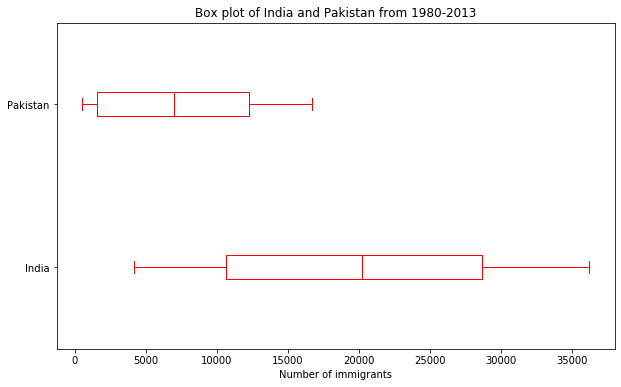

In [22]:
indopak.plot(kind='box', figsize=(10,6), color='red', vert=False)

plt.title('Box plot of India and Pakistan from 1980-2013')
plt.xlabel('Number of immigrants')
plt.show()

### Creating 4 subplots of for boxplots of top 5 countries In Europe, Asia, Africa and Oceania

#### Formatting the data

In [23]:
asia = canada[(canada['Continent']=='Asia')].sort_values('TotalImmigration', ascending=False).head()
eur = canada[(canada['Continent']=='Europe')].sort_values('TotalImmigration', ascending=False).head()
afr = canada[(canada['Continent']=='Africa')].sort_values('TotalImmigration', ascending=False).head()
ocn = canada[(canada['Continent']=='Oceania')].sort_values('TotalImmigration', ascending=False).head()

asia = asia[years].transpose()
eur = eur[years].transpose()
afr = afr[years].transpose()
ocn = ocn[years].transpose()

#### Plotting 4 subplots

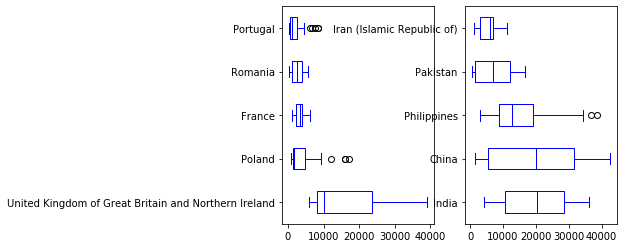

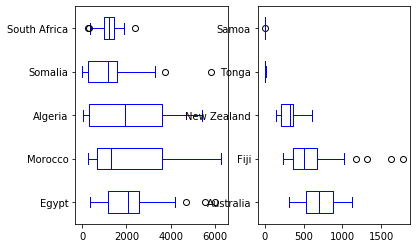

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

fig2 = plt.figure()
ax3 = fig2.add_subplot(1,2,1)
ax4 = fig2.add_subplot(1,2,2)

eur.plot(kind='box', color='blue', vert=False, ax=ax1)
asia.plot(kind='box', color='blue', vert=False, ax=ax2)
afr.plot(kind='box', color='blue', vert=False, ax=ax3)
ocn.plot(kind='box', color='blue', vert=False, ax=ax4)

#### Finding Outliers In The Data

In [25]:
temp = asia.describe()
Q1 = temp.loc['25%', 'Philippines']
Q3 = temp.loc['75%', 'Philippines']
IQR = Q3-Q1

Outlier1 = Q3 + 1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)

asia[asia['Philippines']>Outlier1]

35128.0
-7216.0


Country,India,China,Philippines,Pakistan,Iran (Islamic Republic of)
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479


## Scatter Plots - Bubble Plots

### Formatting The Data

In [26]:
indopak.reset_index(inplace=True)
indopak.rename(columns={'Country':'index','index':'Year'}, inplace=True)
indopak.head()

Country,Year,India,Pakistan
0,1980,8880,978
1,1981,8670,972
2,1982,8147,1201
3,1983,7338,900
4,1984,5704,668


### Plotting a Scatter Plot with a Regression Line

[ 9.34267991e+02 -1.84491593e+06]


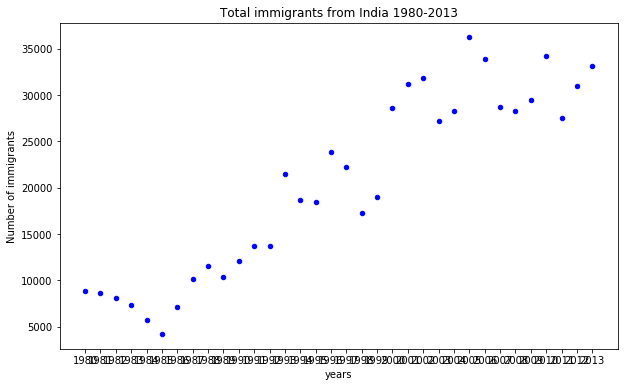

In [27]:
import numpy as np

x = indopak['Year'].astype('int64')
y = indopak['India']
fit = np.polyfit(x,y,deg=1)
print(fit)
indopak.plot(kind='scatter', x='Year', y='India', color='blue', figsize=(10,6))
plt.title('Total immigrants from India 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")

#plt.plot(x, fit[0]*x+fit[1], color='red')
plt.show()

### Plotting 2 Scatter Plots in the Same Figure

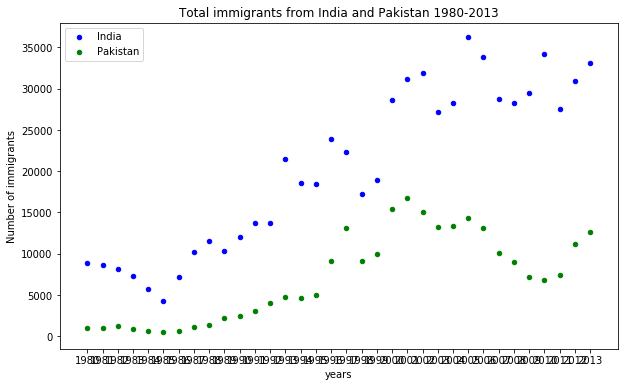

In [28]:
ax0 = indopak.plot(kind='scatter', x='Year', y='India', color='blue', figsize=(10,6))

indopak.plot(kind='scatter', x='Year', y='Pakistan', color='green', figsize=(10,6), ax=ax0)

plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

plt.show()

### Plotting 2 Bubble Plots in the Same Figure

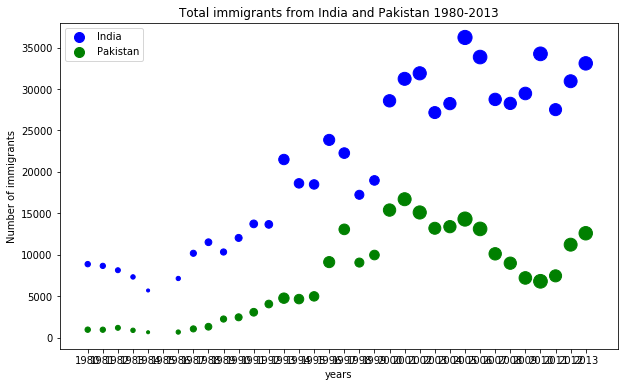

In [29]:
norm_india = (indopak['India'] - indopak['India'].min()) / (indopak['India'].max() - indopak['India'].min())
norm_pak = (indopak['Pakistan'] - indopak['Pakistan'].min()) / (indopak['Pakistan'].max() - indopak['Pakistan'].min())

ax0 = indopak.plot(kind='scatter', x='Year', y='India', color='blue', s=norm_india*200, figsize=(10,6))

indopak.plot(kind='scatter', x='Year', y='Pakistan', color='green', s=norm_india*200, figsize=(10,6), ax=ax0)

plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

plt.show()

## Waffle Charts

### Importing Packages For Creating A Waffle Chart

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pywaffle import Waffle
%matplotlib inline

### Formatting the data

In [31]:
scan = canada.loc[['Sweden', 'Denmark', 'Norway'], :]
scan

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


### Defining The Parameters and Plotting the Data

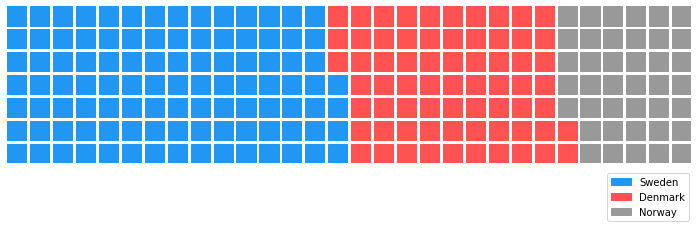

In [32]:
cat = list(scan.index.values)
vals = scan['TotalImmigration']
fig = plt.figure(FigureClass = Waffle, rows = 7, columns = 30, values = vals, labels = list(cat), 
                 colors=["#2196f3", "#ff5252", "#999999"], figsize=(10,5),
                legend = {'loc': 'lower left', 'bbox_to_anchor': (0.87, -0.4)})

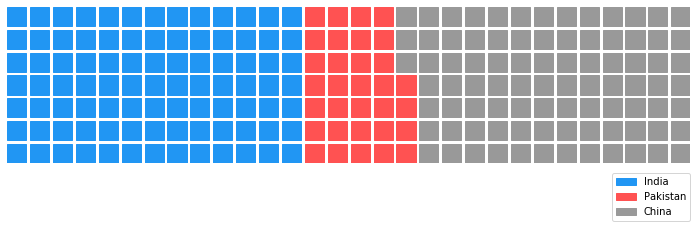

In [33]:
indpakchi = canada.loc[['India', 'Pakistan', 'China'], :]
cat = list(indpakchi.index.values)
vals = indpakchi['TotalImmigration']
fig = plt.figure(FigureClass = Waffle, rows = 7, columns = 30, values = vals, labels = list(cat), 
                 colors=["#2196f3", "#ff5252", "#999999"], figsize=(10,5),
                legend = {'loc': 'lower left', 'bbox_to_anchor': (0.878, -0.4)})

## Word Clouds

### Importing the packages for WordCloud

In [34]:
from wordcloud import WordCloud, STOPWORDS

### Importing The Dataset

In [35]:
alice_novel = open('alice_novel.txt', 'r').read()
# print (alice_novel)

### Removing Stop Words

In [36]:
stopwordsremove = set(STOPWORDS)

alice_wc = WordCloud(background_color = 'white', max_words = 2000,
    stopwords = stopwordsremove)

### Plotting the WordCloud

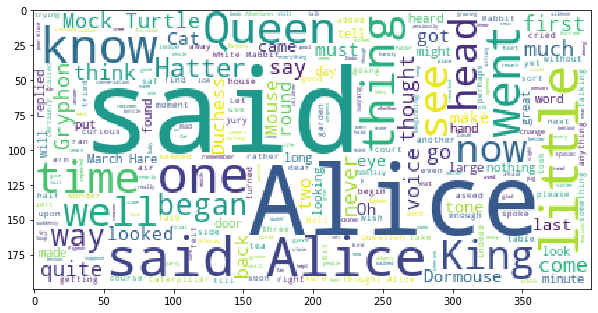

In [37]:
alice_wc.generate(alice_novel)

plt.figure(figsize = (10,15))
plt.imshow(alice_wc)
plt.show()

### Modifiying the WordCloud

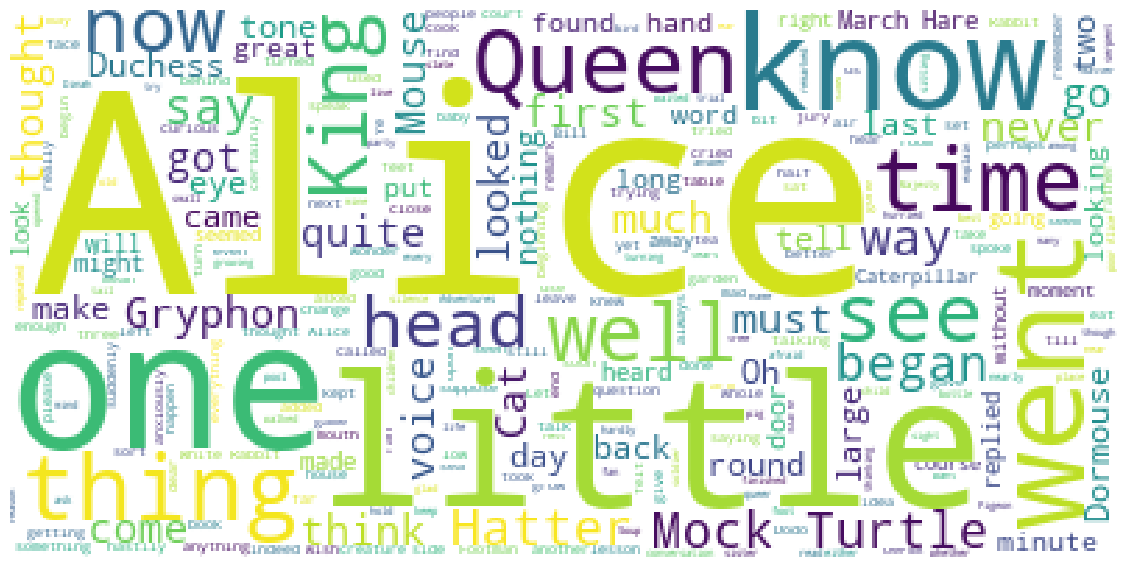

In [38]:
stopwordsremove = set(STOPWORDS)
stopwordsremove.add('said')

alice_wc = WordCloud(background_color = 'white', max_words = 3000,
    stopwords = stopwordsremove)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.imshow(alice_wc)
plt.axis('off')
plt.show()

## Maps

### Importing Packages

In [ ]:
import folium

### Zooming in on a particular location

In [ ]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10)
worldmap

### Black And White Map

In [ ]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10, tiles='Stamen Toner')
worldmap

### Natural Vegetation Format

In [ ]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=1, tiles='Stamen Terrain')
worldmap

### Loading Different Dataset

In [ ]:
incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')
print(incidents.head())
print(incidents.shape)

### Selecting A Subsection of the Dataset

In [ ]:
limit = 100
inc = incidents.iloc[0:limit,:]

In [ ]:
latitude = 37.77
longitude = -122.42
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

### Adding Markers To the map

In [ ]:
#given information about city coordinates
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)

map1

#incident we will impose on the map
incident = folium.map.FeatureGroup()

#reduce size of dataset
df1 = incidents.iloc[0:limit,:]

#loop through the crimes by their lat Y and long X and create markers
for lat, long in zip(df1.Y, df1.X):
    incident.add_child(folium.CircleMarker([lat, long], radius = 5, color = 'yellow', fill=True,
            fill_color='blue').add_to(incident))

#add pop ups
lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.Marker([lat, long], popup=labs).add_to(map1)

#add incidents/crimes to the map
map1.add_child(incident)

### Adding Different Markers to the Map

In [ ]:
#given information about city coordinates
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

#incident we will impose on the map
incident = folium.map.FeatureGroup()

#reduce size of dataset
df1 = df_incidents.iloc[0:limit,:]

#loop through the crimes by their lat Y and long X and create markers
lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.CircleMarker([lat, long], popup=labs, radius=5, color='yellow', fill=True, 
                            fill_color='blue').add_to(map1)

#add incidents/crimes to the map
map1

### Adding Cluster markers to the Map

In [ ]:
#given information about city coordinates
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

#incident we will impose on the map
from folium import plugins
incident = plugins.MarkerCluster().add_to(map1)

#reduce size of dataset
df1 = df_incidents.iloc[0:limit,:]

#loop through the crimes by their lat Y and long X and create markers
lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.CircleMarker([lat, long], popup=labs, radius=5, color='yellow', fill=True,
            fill_color='blue').add_to(incident)

#add incidents/crimes to the map
map1

## Choropeth Markers

In [ ]:
world_geo = r'/Users/nmims/Desktop/Semester V/Machine Learning/Exercise 4/world_countries.json'

### Exploring The Dataset

In [ ]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-Status'}, inplace=True)
canada['TotalImmigration'] = canada.sum(axis='columns')
canada.head()

### Making a choropleth Map

In [ ]:
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(geo_data=world_geo, data=canada, columns=['Country', 'TotalImmigration'], 
                     key_on='feature.properties.name', fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
                     legend_name='Immigration to Canada')

# display map
world_map

In [ ]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(geo_data=world_geo, data=canada, columns=['Country', 'Total'], 
                     key_on='feature.properties.name', threshold_scale=threshold_scale, fill_color='YlOrRd', 
                     fill_opacity=0.7, line_opacity=0.2, legend_name='Immigration to Canada', reset=True)
world_map